In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error

In [2]:

import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras import Sequential
from keras.layers import Flatten, Dense, Conv1D, MaxPooling1D, Activation, Dropout, Input
import pandas as pd

In [3]:
df = pd.read_csv('../../data/telecom_pca.csv')
X = df.drop(columns=['TARGET'])
columns = X.columns
Y = df['TARGET']
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X, columns= columns)

In [4]:
X.shape[1:]

(19,)

In [5]:
#tamaño de los batches y epocas a emplear
batch_size=32
epochs=50

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)

In [7]:
X.shape[1:]

(19,)

In [8]:
X = tf.random.normal([10, 5, 19])

In [9]:
K.clear_session()
model = Sequential()

model.add(Conv1D(filters = 32, kernel_size = 1,padding = 'Same',activation ='relu', input_shape=[19, 1]))
model.add(MaxPooling1D(pool_size=(1)))

model.add(Conv1D(filters = 64, kernel_size = 1,padding = 'Same',activation ='relu'))
model.add(MaxPooling1D(pool_size=(1)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Activation('relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 19, 32)            64        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 19, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 19, 64)            2112      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 19, 64)           0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 1216)              0         
                                                                 
 dropout (Dropout)           (None, 1216)              0

In [12]:
History = model.fit(X_train,y_train, batch_size = 10, epochs = 8, verbose = 10, validation_data = (X_test, y_test))

Epoch 1/8
Epoch 2/8
Epoch 3/8
Epoch 4/8
Epoch 5/8
Epoch 6/8
Epoch 7/8
Epoch 8/8


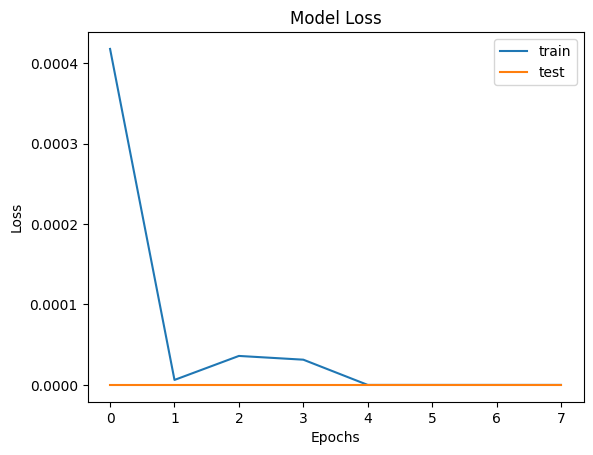

In [13]:
#Graficacion del Loss del modelo
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

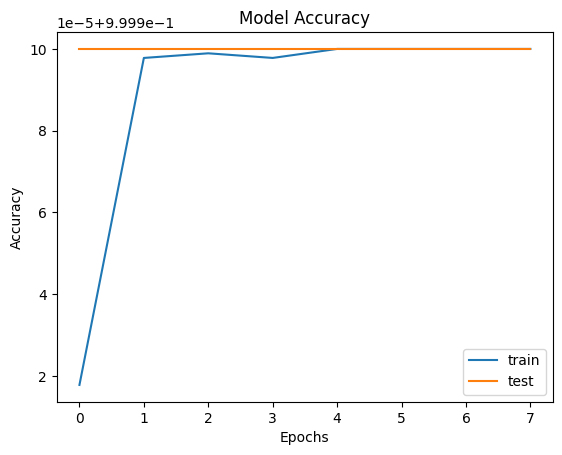

In [14]:
#Graficacion del Accuracy del modelo
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [15]:
#Accuracy y Loss del modelo
score_model1 = model.evaluate(X_test, y_test, verbose=0)
print('Test loss CNN:', score_model1[0])
print('Test accuracy CNN:', score_model1[1])

Test loss CNN: 3.2381672526837877e-16
Test accuracy CNN: 1.0


In [16]:
y_pred = model.predict(X_test)

7129/7129 [==============================] - 13s 2ms/step


In [17]:
y_pred_train = model.predict(X_train)

28516/28516 [==============================] - 49s 2ms/step


In [18]:
mse_test = mean_squared_error(y_test, y_pred)
mse_test

1.7155445874146307e-30

In [19]:
mae_test = mean_absolute_error(y_test,y_pred)
mae_test

3.2381618921806786e-16

In [20]:
mse_train = mean_squared_error(y_train,y_pred_train)
mse_train

1.71321591225856e-30

In [21]:
mae__train = mean_absolute_error(y_train, y_pred_train)
mae__train

3.2427412118834395e-16